In [1]:
%matplotlib notebook

/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import os
os.environ['FIPY_SOLVERS'] = "scipy" # "trilinos"

In [3]:
import fipy as fp
from fipy.tools.numerix import cos, sin

In [4]:
mesh = fp.Grid2D(nx=100, ny=100)

In [5]:
c = fp.CellVariable(mesh=mesh, name="$c$", hasOld=True)

In [6]:
psi = fp.CellVariable(mesh=mesh, name=r"$\psi$", hasOld=True)

In [7]:
Phi = fp.CellVariable(mesh=mesh, name=r"$\Phi$", hasOld=True)

In [8]:
calpha = 0.3
cbeta = 0.7
kappa = 2.
rho = 5.
M = 5.
k = 0.09
epsilon = 9.

Boundary condition is stipulated as $\nabla c \cdot \hat{n} = 0$, which is not no-flux. Constraining c.faceGrad to zero seems to do nothing, so we impose a flux constraint on the remainder of the flux (assuming that $\nabla^3 c \cdot \hat{n} = 0$). Thus,
\begin{align*}
\vec{J} &= M\nabla\left(\frac{\partial^2 f_{chem}}{\partial c^2}\nabla c - \kappa \nabla^2 c + k \Phi\right) 
\\
&\approx M\nabla\left(k \Phi\right) 
\end{align*}
on exterior faces.

In [ ]:
c_BC = (M*k*Phi.faceGrad*mesh.exteriorFaces).divergence

In [9]:
ceq = fp.TransientTerm(var=c) == fp.DiffusionTerm(coeff=M, var=psi) + c_BC

In [10]:
dfchemdc = 2 * rho * (c - calpha) * (cbeta - c) * (calpha + cbeta - 2 * c)

In [11]:
d2fchemd2c = 2 * rho * ((calpha + cbeta - 2 * c)**2 - 2 * (c - calpha) * (cbeta - c))

In [12]:
psieq = (fp.ImplicitSourceTerm(coeff=1., var=psi) 
         == fp.ImplicitSourceTerm(coeff=d2fchemd2c, var=c) - d2fchemd2c * c + dfchemdc
         - fp.DiffusionTerm(coeff=kappa, var=c)
         + fp.ImplicitSourceTerm(coeff=k, var=Phi))

In [13]:
Phieq = fp.DiffusionTerm(var=Phi) == 0. # fp.ImplicitSourceTerm(coeff=-k/epsilon, var=c)

In [14]:
eq = ceq & psieq & Phieq

In [15]:
x, y = mesh.cellCenters
X, Y = mesh.faceCenters

In [17]:
Phi.faceGrad.constrain(0., where=mesh.facesTop | mesh.facesBottom)
Phi.constrain(0., where=mesh.facesLeft)
Phi.constrain(sin(Y/7.), where=mesh.facesRight)

In [18]:
c0 = 0.5
c1 = 0.04

In [28]:
c.setValue(c0 + c1 * (cos(0.2*x) * cos(0.11*y) 
                      + (cos(0.13*x) * cos(0.087*y))**2 
                      + cos(0.025*x - 0.15*y) * (cos(0.07*x - 0.02*y))))
Phi.setValue(0.)

<IPython.core.display.Javascript object>


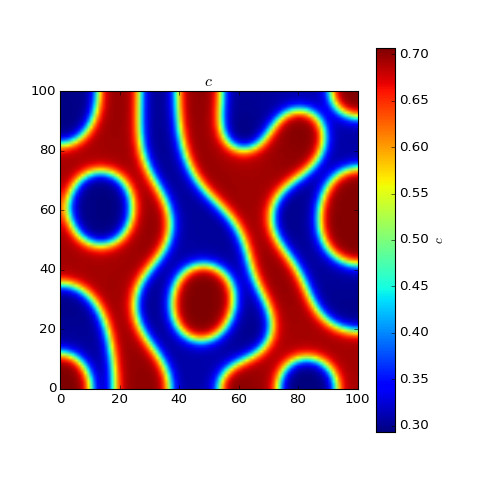

<IPython.core.display.Javascript object>


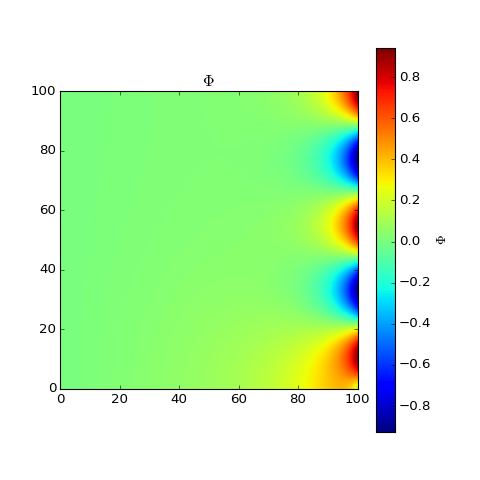

In [20]:
viewer = fp.Viewer(vars=(c, Phi))

In [29]:
viewer.plot()

In [30]:
for t in range(95000):
    c.updateOld()
    psi.updateOld()
    Phi.updateOld()
    for sweep in range(1):
        res = eq.sweep(dt=.1) #, solver=fp.LinearGMRESSolver(precon=fp.JacobiPreconditioner()))
#        print t, sweep, res # , c.cellVolumeAverage
    print t, c.cellVolumeAverage
    viewer.plot()
#    print t

0 0.509758112594
1 0.509758112594
2 0.509758112594
3 0.509758112594
4 0.509758112594
5 0.509758112594
6 0.509758112594
7 0.509758112594
8 0.509758112594
9 0.509758112594
10 0.509758112594
11 0.509758112594
12 0.509758112594
13 0.509758112594
14 0.509758112594
15 0.509758112594
16 0.509758112594
17 0.509758112594
18 0.509758112594
19 0.509758112594
20 0.509758112594
21 0.509758112594
22 0.509758112594
23 0.509758112594
24 0.509758112594
25 0.509758112594
26 0.509758112594
27 0.509758112594
28 0.509758112594
29 0.509758112594
30 0.509758112594
31 0.509758112594
32 0.509758112594
33 0.509758112594
34 0.509758112594
35 0.509758112594
36 0.509758112594
37 0.509758112594
38 0.509758112594
39 0.509758112594
40 0.509758112594
41 0.509758112594
42 0.509758112594
43 0.509758112594
44 0.509758112594
45 0.509758112594
46 0.509758112594
47 0.509758112594
48 0.509758112594
49 0.509758112594
50 0.509758112594
51 0.509758112594
52 0.509758112594
53 0.509758112594
54 0.509758112594
55 0.509758112594
56

KeyboardInterrupt: 